# Multi Layer Perceptron

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

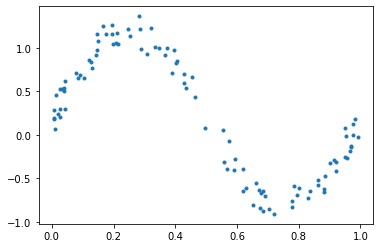

In [2]:
N = 100
X = np.random.rand(N, 1) # 2 dimension tensor
Y = np.sin(2 *np.pi * X) + 0.4 * np.random.rand(N, 1) # 2-d tensor
plt.plot(X, Y, '.')
plt.show()

In [18]:
def relu(x):
    return tf.where(x >= 0, x, 0)

class MLP():
    def __init__(self, neurons=[1, 100, 100, 1], activation=[relu, relu, None]):
        self.W = []
        self.activation = activation
        
        for i in range(1, len(neurons)):
            self.W.append(tf.Variable(np.random.randn(neurons[i-1], neurons[i]))) # W
            self.W.append(tf.Variable(np.random.randn(neurons[i]))) #b

    def __call__(self, x):
        for i in range(0, len(self.W), 2): # W and bias 
            x = x @ self.W[i] + self.W[i+1]
            if self.activation[i // 2] is not None: # //2 beacuse step=2
                x = self.activation[i // 2](x)
        return x


In [19]:
lr = 0.0001
model = MLP()

for epoch in range(7000):
    with tf.GradientTape() as t:
        loss = tf.reduce_mean((model(X) - Y)**2)
    dW = t.gradient(loss, model.W)
    
    for i, W in enumerate(model.W):
        W.assign_sub(lr * dW[i])
        
    if epoch % 1000 == 0:
        print(loss.numpy())


8305.833999442479
0.02806142577277027
0.020705137398090625
0.016956202487891182
0.014608116888876747
0.013379056246060634
0.012726207529514654


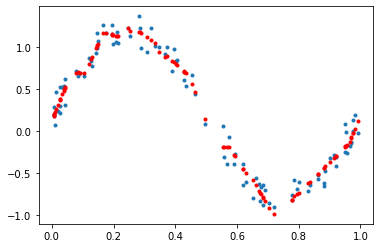

In [20]:
Z = model(X)
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()